In [3]:
import pandas as pd
data=pd.read_csv("FB_data.csv")
print(data)

          Date        Open        High         Low       Close   Adj Close  \
0    6/20/2019  190.949997  191.160004  187.639999  189.529999  189.529999   
1    6/21/2019  188.750000  192.000000  188.750000  191.139999  191.139999   
2    6/24/2019  192.419998  193.979996  191.570007  192.600006  192.600006   
3    6/25/2019  192.880005  193.139999  188.130005  188.839996  188.839996   
4    6/26/2019  189.539993  190.759995  187.309998  187.660004  187.660004   
..         ...         ...         ...         ...         ...         ...   
248  6/15/2020  225.089996  233.770004  224.800003  232.500000  232.500000   
249  6/16/2020  237.139999  238.460007  233.000000  235.649994  235.649994   
250  6/17/2020  235.000000  237.589996  231.729996  235.529999  235.529999   
251  6/18/2020  234.990005  236.139999  232.149994  235.940002  235.940002   
252  6/19/2020  237.789993  240.830002  235.550003  238.789993  238.789993   

       Volume  
0    14635700  
1    22751200  
2    15509000  

In [5]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Date"]=pd.to_datetime(data["Date"],errors='coerce')
data["Date"]=b.fit_transform(data["Date"])
print(data)

     Date        Open        High         Low       Close   Adj Close  \
0       0  190.949997  191.160004  187.639999  189.529999  189.529999   
1       1  188.750000  192.000000  188.750000  191.139999  191.139999   
2       2  192.419998  193.979996  191.570007  192.600006  192.600006   
3       3  192.880005  193.139999  188.130005  188.839996  188.839996   
4       4  189.539993  190.759995  187.309998  187.660004  187.660004   
..    ...         ...         ...         ...         ...         ...   
248   148  225.089996  233.770004  224.800003  232.500000  232.500000   
249   149  237.139999  238.460007  233.000000  235.649994  235.649994   
250   150  235.000000  237.589996  231.729996  235.529999  235.529999   
251   151  234.990005  236.139999  232.149994  235.940002  235.940002   
252   152  237.789993  240.830002  235.550003  238.789993  238.789993   

       Volume  
0    14635700  
1    22751200  
2    15509000  
3    16750300  
4    12808600  
..        ...  
248  153403

In [10]:
x=data.drop("Volume",axis=1)
y=data["Volume"]
from sklearn.decomposition import PCA
z=PCA(n_components=2)
x=z.fit_transform(x)
x=pd.DataFrame(data=x,columns=["a","b"])

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

             a          b
114  47.455061  -4.209033
247  66.345337  56.137045
128 -21.142615  31.036005
200  22.706703 -83.538871
155  -3.302895  21.097327
..         ...        ...
245  72.691340  76.501574
45  -85.943001 -12.026234
34   39.425370 -30.018039
154  -1.577792  29.850143
40  -87.709505  -0.900705

[247 rows x 2 columns]
114    11503400
247    22071700
128    27306900
200    28453600
155    31359900
         ...   
245    20720700
45     17323400
34     14828900
154    48775500
40     12654600
Name: Volume, Length: 247, dtype: int64


In [14]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [16]:
c=br.predict([[53.76387,198.655]])
print(c)

[11932610.73661814]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  2.,  1.,  2.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  3.,  1.,  3.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  4.,  5.,  3.,  0.,  0.,  0.,  0.,  0.],
        [17., 16., 12.,  7.,  1.,  2.,  2.,  0.,  0.,  0.],
        [10., 21., 13.,  6.,  2.,  1.,  0.,  0.,  1.,  1.],
        [ 9., 15.,  8.,  6.,  2.,  2.,  1.,  1.,  0.,  2.],
        [ 1., 16.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,  0.],
        [ 2.,  9.,  5.,  2.,  1.,  1.,  2.,  0.,  0.,  1.],
        [ 0.,  0.,  4.,  3.,  1.,  1.,  2.,  0.,  0.,  1.]]),
 array([137.100006 , 146.9450057, 156.7900054, 166.6350051, 176.4800048,
        186.3250045, 196.1700042, 206.0150039, 215.8600036, 225.7050033,
        235.550003 ]),
 array([ 6046300., 10457960., 14869620., 19281280., 23692940., 28104600.,
        32516260., 36927920., 41339580., 45751240., 50162900.]),
 <matplotlib.collections.QuadMesh at 0x7caae5fd2b10>)

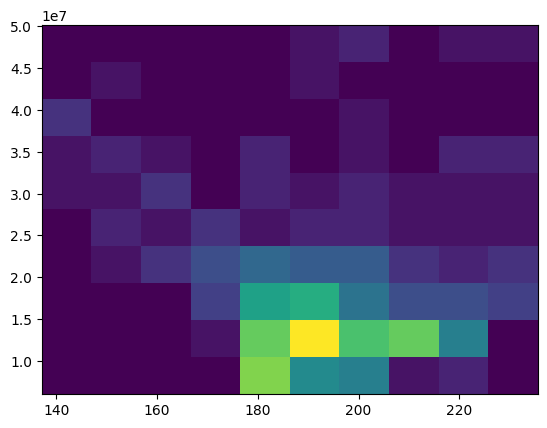

In [19]:
from matplotlib import pyplot as plt
plt.hist2d(data["Low"],data["Volume"])